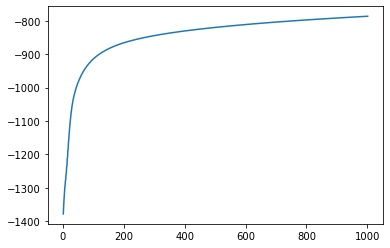

In [9]:
import LogisticRecognition as lr
import CIFAR_read as cifar
import matplotlib.pyplot as plt

#Mess around with these values!
#These are the values that modify which images/batches will be used
IMAGE1 = 0            #[0 - 10]
IMAGE2 = 3            #[0 - 10]
TRAIN_BATCH = 1       #[1 - 5]

#These are the values that directly change the fit function, which may increase/decrease accuracy (or just break the function)
EPSILON = 0.02        #Default: 0.02
STEP = 0.000005       #Default: 0.000005
START = 0             #Default: 0
MAX = 1000            #Default: 2000


train_x, train_y = cifar.readCIFAR(f"data_batch_{TRAIN_BATCH}")
train_x, train_y = lr.formatData(train_x, train_y, IMAGE1, IMAGE2)

Z = lr.fit(train_x, train_y, EPSILON, STEP, START, len(train_x[0]), max=MAX) #Should take around 60-90s to train with MAX = 2000
plt.plot(Z[2], Z[1])
plt.show()

This is the log-likelihood distribution function. The x-axis is the number of iterations done in the training phase, the y-axis is the value being approached by the log-likelihood function. The goal is to have the derivative of this function approach 0. 

Correct IMAGE1: 820, correct IMAGE2: 813
Incorrect IMAGE1: 180, incorrect IMAGE2: 187
Accuracy: 81.65%
Randomly selected correct classifications: 


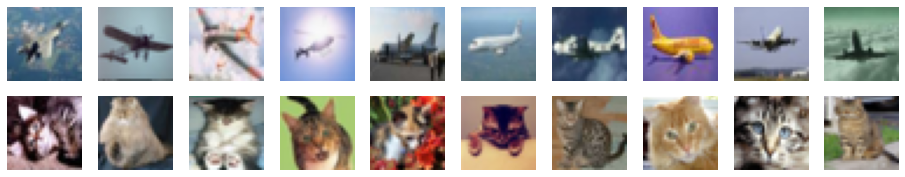

Randomly selected incorrect classifications: 


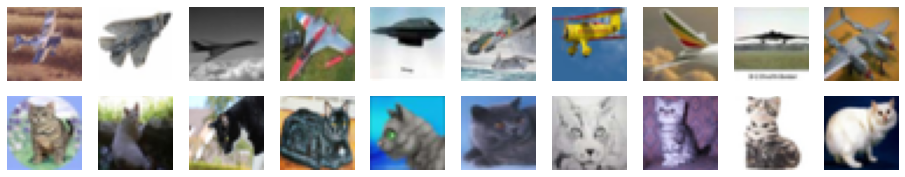

In [10]:
test_x, test_y = cifar.readCIFAR("test_batch")
test_x, test_y = lr.formatData(test_x, test_y, IMAGE1, IMAGE2)

correct, incorrect = cifar.testCIFAR(test_x, test_y, Z[0])
lr.accuracyEvaluation(correct, incorrect, len(test_y))

#Creating new image batch
import random

images, labels = cifar.CIFARimg("test_batch")
n_img = []
for i in range(len(labels)):
    if labels[i] == IMAGE1 or labels[i] == IMAGE2:
        n_img.append(images[i])

print("Randomly selected correct classifications: ")
fig, axes1 = plt.subplots(2,10,figsize=(16,3))
for j in range(2):
    for k in range(10):
        i = random.choice(correct[j])
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(n_img[i:i+1][0])
plt.show()

print("Randomly selected incorrect classifications: ")
fig, axes1 = plt.subplots(2,10,figsize=(16,3))
for j in range(2):
    for k in range(10):
        i = random.choice(incorrect[j])
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(n_img[i:i+1][0])

plt.show()
